# Analysis of the data generated by Picoscope
# complete the introduction!!!!!!! maybe include the photo of the set up you made

In [1]:
#import useful files
import statistics as stat
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#file path with glob
path = "Picoscope_files/"
all_files = glob.glob(path + "*.csv")

In [3]:
#shows all selected files once comma is removed
all_files;

In [4]:
#turn all 512 files into lists
var = [pd.read_csv(filename,index_col=None,header=0) for filename in all_files]

In [5]:
var[0]

,Time,Channel A,Channel B,Channel C,Channel D
0,(ns),(mV),(mV),(mV),(V)
1,-15.30980383,0.00000000,-0.01537894,3.81397600,0.00784326
2,-15.22980382,-0.01537894,-0.16916830,3.66018700,0.00784326
3,-15.14980382,0.00000000,-0.49212600,3.59867100,0.00787402
4,-15.06980382,0.00000000,-0.92273620,3.59867100,0.00790477
...,...,...,...,...,...
656,37.09019687,2.52214600,-2.04539800,6.78211100,0.00836614
657,37.17019688,3.01427100,-2.69131400,7.32037400,0.00821235
658,37.25019688,3.44488200,-3.24495600,7.72022600,0.00805856
659,37.33019688,3.73708200,-3.66018700,7.93553100,0.00793553


In [6]:
#concat all lists and turn into 1 big dataframe
dataframe = pd.concat(var,axis=0,ignore_index=True)

In [7]:
#renaming the headers (they came as Channel 1,2,3,4 - need to know what they represent)
rename = ['Time','Green Light Residual','PMT 1 - smaller Focal Receptor', 'Green Light Pulse','PMT 2 - Larger Focal receptor']
dataframe.columns = rename

In [8]:
#identify the type of the dataframe columns
dataframe.dtypes

Time                              object
Green Light Residual              object
PMT 1 - smaller Focal Receptor    object
Green Light Pulse                 object
PMT 2 - Larger Focal receptor     object
dtype: object

Clear to see that all the dataframe columns are of type object due to default setting. To perform any graphing or data analysis we will need to convert the type into floats.

In [9]:
#observe the dataframe
dataframe

,Time,Green Light Residual,PMT 1 - smaller Focal Receptor,Green Light Pulse,PMT 2 - Larger Focal receptor
0,(ns),(mV),(mV),(mV),(V)
1,-15.30980383,0.00000000,-0.01537894,3.81397600,0.00784326
2,-15.22980382,-0.01537894,-0.16916830,3.66018700,0.00784326
3,-15.14980382,0.00000000,-0.49212600,3.59867100,0.00787402
4,-15.06980382,0.00000000,-0.92273620,3.59867100,0.00790477
...,...,...,...,...,...
338427,37.17575787,2.21456700,2.44525100,3.64480800,0.01184178
338428,37.25575788,2.67593500,2.82972400,3.59867100,0.01076526
338429,37.33575788,3.10654500,3.19881900,3.59867100,0.00971949
338430,37.41575788,3.49101900,3.52177600,3.66018700,0.00882751


From above, we can see that some of the rows will have (ns) (mV) (V) which are the units brought in as they were in the original excel sheet. We need to remove them so our dataframe can be of type float only.

In [10]:
#Axe all the rows that have the units i.e. remove the strings/objects
clean_dataframe = dataframe.drop(dataframe[dataframe['Time'] == '(ns)'].index)

In [11]:
#checking we got rid of the right amount of rows
axed_data = dataframe.shape[0] - clean_dataframe.shape[0] 
print(axed_data,'rows has been removed from original dataframe.')

512 rows has been removed from original dataframe.


Exactly 512 rows have been removed from the original dataframe, we can be confident that we have not removed extra useful data points as there are 512 excel sheets which were brought in and each had 1 row that had all the units.

Finally, we can actually change the type of the dataframe:

In [12]:
#change the data type
Clean_dataframe = clean_dataframe.astype(float)

Always begin with a description of the numerical dataframe

In [13]:
#describe the dataframe
Clean_dataframe.describe()

,Time,Green Light Residual,PMT 1 - smaller Focal Receptor,Green Light Pulse,PMT 2 - Larger Focal receptor
count,337920.000000,337920.000000,337920.000000,337920.000000,337920.000000
mean,10.932035,-28.342100,-26.943624,10.646960,-0.025649
std,15.243315,92.236703,82.261846,38.517515,0.113499
min,-16.000000,-496.970300,-483.313800,-24.883120,-0.736805
25%,-2.264616,-7.258858,-8.120078,3.598671,-0.000185
50%,10.935385,-1.568651,-3.921629,3.937008,0.006213
75%,24.135385,0.276821,-0.492126,4.290723,0.007905
max,37.510001,31.526820,37.586120,376.953100,0.031312


We need all our units to be constant before plotting, so we must change PMT 2 from $V$ into $mV$.

In [14]:
#Create a new column called PMT 2 which is the column PMT 2 - Larger Focal Length but in mV
uniform_dataframe=Clean_dataframe.assign(PMT2 = Clean_dataframe['PMT 2 - Larger Focal receptor']*1000)

In [15]:
#Check the dataframe
uniform_dataframe

,Time,Green Light Residual,PMT 1 - smaller Focal Receptor,Green Light Pulse,PMT 2 - Larger Focal receptor,PMT2
1,-15.309804,0.000000,-0.015379,3.813976,0.007843,7.84326
2,-15.229804,-0.015379,-0.169168,3.660187,0.007843,7.84326
3,-15.149804,0.000000,-0.492126,3.598671,0.007874,7.87402
4,-15.069804,0.000000,-0.922736,3.598671,0.007905,7.90477
5,-14.989804,0.000000,-1.430241,3.644808,0.007905,7.90477
...,...,...,...,...,...,...
338427,37.175758,2.214567,2.445251,3.644808,0.011842,11.84178
338428,37.255758,2.675935,2.829724,3.598671,0.010765,10.76526
338429,37.335758,3.106545,3.198819,3.598671,0.009719,9.71949
338430,37.415758,3.491019,3.521776,3.660187,0.008828,8.82751


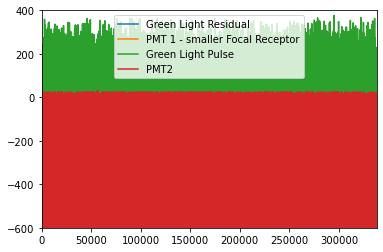

In [16]:
#Show me all pulses, note:x axis is index, not time - yet
plot_columns = ['Green Light Residual','PMT 1 - smaller Focal Receptor', 'Green Light Pulse','PMT2']
uniform_dataframe[plot_columns].plot()

ax = plt.gca()
ax.set(xlim = (0,uniform_dataframe.shape[0]), ylim = (-600,400))
#ax.set_xticklabels(uniform_dataframe['Time'], rotation=0)
#ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.show()

Now we rename the column and replot the graph to get a better visual

In [17]:
#delete the column in the wrong units
del uniform_dataframe['PMT 2 - Larger Focal receptor']

In [18]:
#rename the uniform columns
uniform_dataframe.rename(columns={'PMT2': 'PMT 2 - Larger Focal Receptor', 'PMT 1 - smaller Focal Receptor':'PMT 1 - Smaller Focal Receptor'}, inplace=True)

In [19]:
#Setting the Time as the index column
uniform_dataframe.set_index("Time",drop=True,inplace=True)

In [20]:
uniform_dataframe

,Green Light Residual,PMT 1 - Smaller Focal Receptor,Green Light Pulse,PMT 2 - Larger Focal Receptor
Time,,,,
-15.309804,0.000000,-0.015379,3.813976,7.84326
-15.229804,-0.015379,-0.169168,3.660187,7.84326
-15.149804,0.000000,-0.492126,3.598671,7.87402
-15.069804,0.000000,-0.922736,3.598671,7.90477
-14.989804,0.000000,-1.430241,3.644808,7.90477
...,...,...,...,...
37.175758,2.214567,2.445251,3.644808,11.84178
37.255758,2.675935,2.829724,3.598671,10.76526
37.335758,3.106545,3.198819,3.598671,9.71949


Now we will replot the graph with all datapoints overlapping eachother and with the correct axis

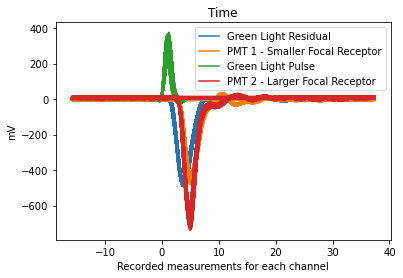

In [21]:
#Show me a pulse with time as the x axis
import matplotlib.ticker as mtick
plot_columns = ['Green Light Residual','PMT 1 - Smaller Focal Receptor', 'Green Light Pulse','PMT 2 - Larger Focal Receptor']
uniform_dataframe[plot_columns].plot()

plt.xlabel('Recorded measurements for each channel')
plt.ylabel('mV')
plt.title('Time')
plt.show()

In [22]:
#Renaming the dataframe into better names for analysis - spaces aren't good!
uniform_dataframe.rename(columns={'PMT 2 - Larger Focal Receptor': 'Larger_Focal_Receptor', 
                                                  'PMT 1 - Smaller Focal Receptor':'PMT_1_Smaller_Focal_Receptor',
                                                  'Green Light Residual':'Green_Light_Residual',
                                                    'Green Light Pulse':'Green_Light_Pulse'}, inplace=True)

In [23]:
#New column names ready for analysis
uniform_dataframe

,Green_Light_Residual,PMT_1_Smaller_Focal_Receptor,Green_Light_Pulse,Larger_Focal_Receptor
Time,,,,
-15.309804,0.000000,-0.015379,3.813976,7.84326
-15.229804,-0.015379,-0.169168,3.660187,7.84326
-15.149804,0.000000,-0.492126,3.598671,7.87402
-15.069804,0.000000,-0.922736,3.598671,7.90477
-14.989804,0.000000,-1.430241,3.644808,7.90477
...,...,...,...,...
37.175758,2.214567,2.445251,3.644808,11.84178
37.255758,2.675935,2.829724,3.598671,10.76526
37.335758,3.106545,3.198819,3.598671,9.71949


In [24]:
#Split the large dataframe into 511 smaller dataframes
def split_dataframe_by_position(df, splits):
    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
split_dataframes = split_dataframe_by_position(uniform_dataframe, 511)
#Test if our split is working
print('Quick test, the max value of the last df = ',split_dataframes[510].Green_Light_Pulse.max())

Quick test, the max value of the last df =  291.4616


In [25]:
#For loop puts all the local Max Voltages into an empty list called localMaxVoltages
localMaxVoltage = []
localMaxVoltageTime = []
i = 0
for i in range(0,511,1):
    localMaxVoltage.append(split_dataframes[i].Green_Light_Pulse.max())
    localMaxVoltageTime.append(split_dataframes[i].Green_Light_Pulse.idxmax())

In [26]:
#Quick analysis of the local Max Voltages
print('Length of the list of Max Voltages: {0} mV'.format(len(localMaxVoltage)))
print('Maximum of Max Voltages: {0} mV'.format(max(localMaxVoltage)))
print('Minimum of Max Voltages {0} mV'.format(min(localMaxVoltage)))
print('Mean of Max Voltages: {0} mV'.format(stat.mean(localMaxVoltage)))
print('Median of Max Voltages: {0} mV'.format(stat.median(localMaxVoltage)))
print('Standard Deviation of Max voltages: {0} mV'.format(stat.stdev(localMaxVoltage)))

Length of the list of Max Voltages: 511 mV
Maximum of Max Voltages: 376.9531 mV
Minimum of Max Voltages 212.137 mV
Mean of Max Voltages: 290.41272935420744 mV
Median of Max Voltages: 291.1848 mV
Standard Deviation of Max voltages: 38.80774573754574 mV


In [27]:
#Quick analysis of the time of local Max Voltages
print('Length of the list of Time: {0} ns'.format(len(localMaxVoltageTime)))
print('Maximum Time of Max Voltages: {0} ns'.format(max(localMaxVoltageTime)))
print('Minimum Time of Max Voltages {0} ns'.format(min(localMaxVoltageTime)))
print('Time of Mean of Max Voltages: {0} ns'.format(stat.mean(localMaxVoltageTime)))
print('Time of Median of Max Voltages: {0} ns'.format(stat.median(localMaxVoltageTime)))
print('Standard Deviation of Time of Max voltages: {0} ns'.format(stat.stdev(localMaxVoltageTime)))

Length of the list of Time: 511 s
Maximum Time of Max Voltages: 1.3764104 s
Minimum Time of Max Voltages 0.55724139 s
Time of Mean of Max Voltages: 1.0533753722309198 s
Time of Median of Max Voltages: 1.0857144 s
Standard Deviation of Time of Max voltages: 0.19946907167399577 s


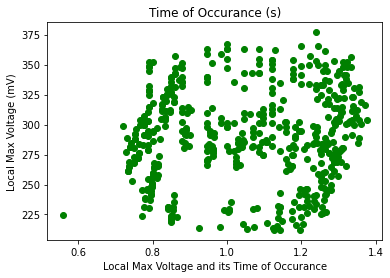

In [52]:
#Scatterplot of the local Max Voltage value and its Time of occurance
plt.scatter(localMaxVoltageTime,localMaxVoltage, c = 'g')

plt.xlabel('Local Max Voltage and its Time of Occurance')
plt.ylabel('Local Max Voltage (mV)')
plt.title('Time of Occurance (s)')
plt.show()

Text(0.5, 1.0, 'Distribution of maximum voltages')

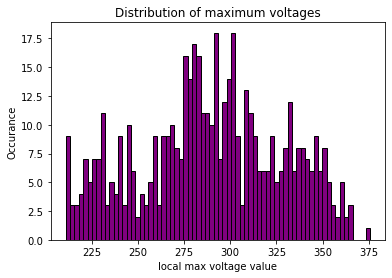

In [29]:
#Histogram of the distribution of the local max voltages
plt.hist(localMaxVoltage, bins=70, align = 'left', color='purple', edgecolor='black')

plt.xlabel('local max voltage value (mV)')
plt.ylabel('Occurance')
plt.title('Distribution of maximum voltages')
plt.show()

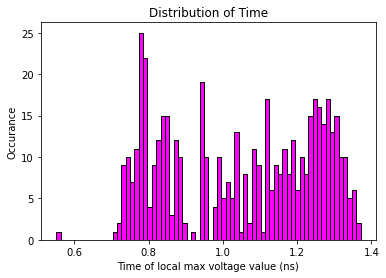

In [44]:
#Histogram of the distribution showing Time of the local max voltages
plt.hist(localMaxVoltageTime, bins=70, align = 'left', color='magenta', edgecolor='black')

plt.xlabel('Time of local max voltage value (ns)')
plt.ylabel('Occurance')
plt.title('Distribution of Time')
plt.show()